In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('5_Under_chair.txt',sep='\t')

df['Time']=np.arange(0,len(df['qi']))/100 #diversa freq

(20.0, 40.0)

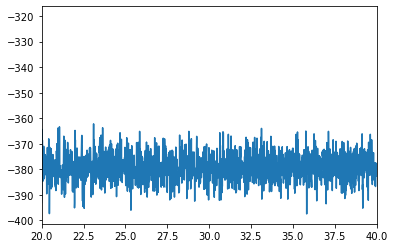

In [90]:
import matplotlib.pyplot as plt

#da 700 a 9000 in x con rumore (5900-6200 )

%matplotlib inline

plt.plot(df['Time'].iloc[700:9000],df['AccX'].iloc[700:9000])
plt.xlim(20,40)

<IPython.core.display.Javascript object>


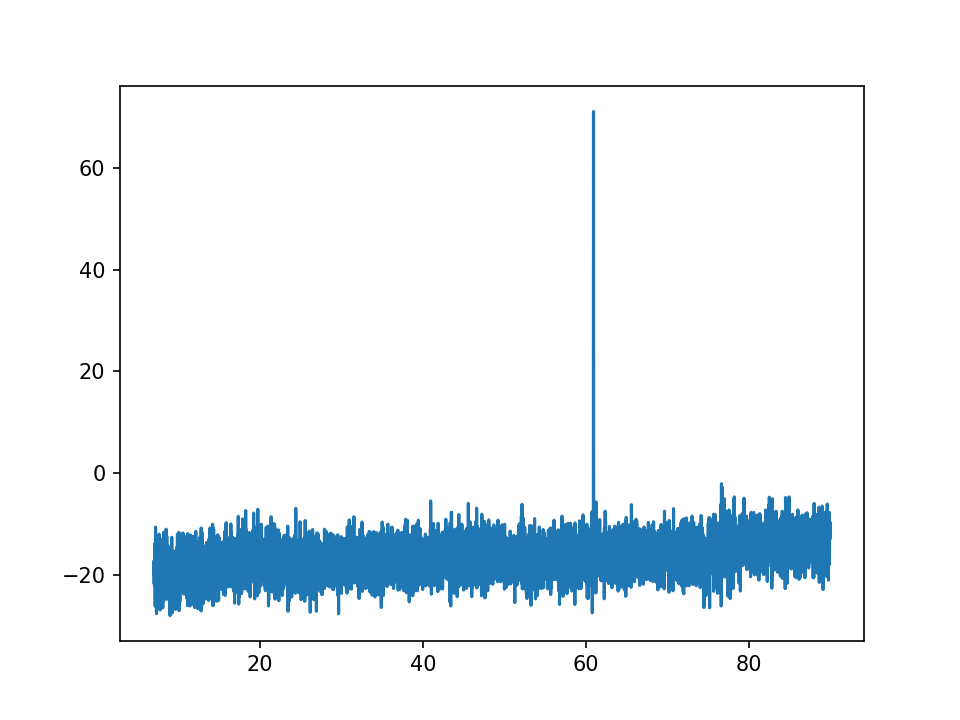

In [30]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'].iloc[700:9000],df['AccY'].iloc[700:9000])

<IPython.core.display.Javascript object>


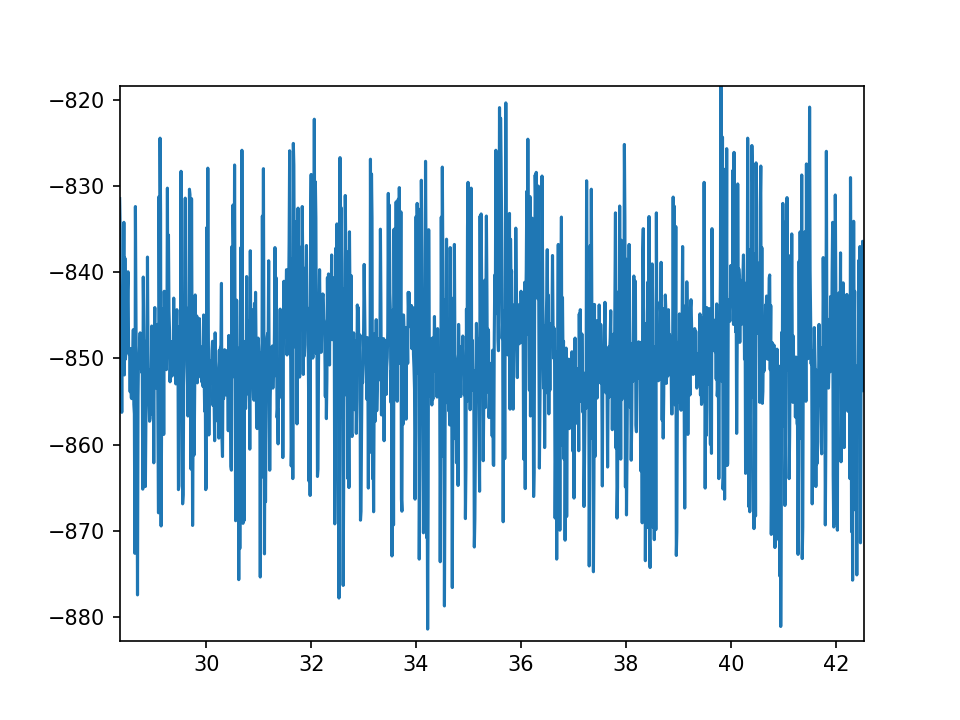

In [31]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'].iloc[700:9000],df['AccZ'].iloc[700:9000])


<IPython.core.display.Javascript object>


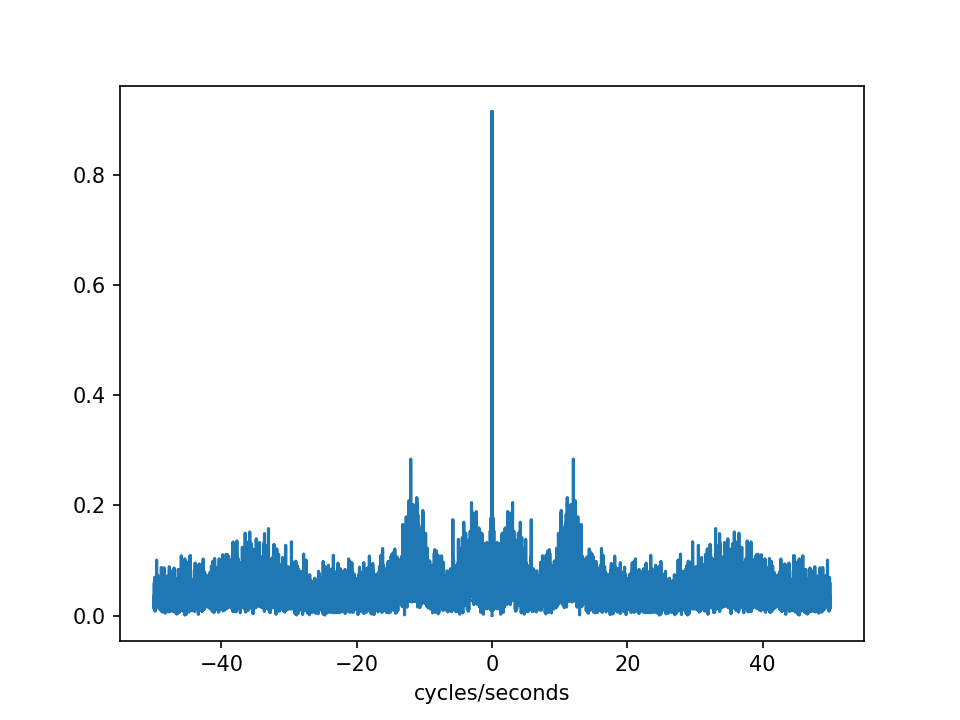

Text(0.5, 0, 'cycles/seconds')

In [3]:
import numpy as np
gyroxfreq=np.fft.fft(df['AccX'].iloc[700:9000]-np.mean(df['AccX'].iloc[700:9000]))/len(df['AccX'].iloc[700:9000]) #normalized

freq=np.fft.fftfreq(d=1/100, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))
#plt.xlim(-0.3,5)
plt.xlabel('cycles/seconds')

<IPython.core.display.Javascript object>


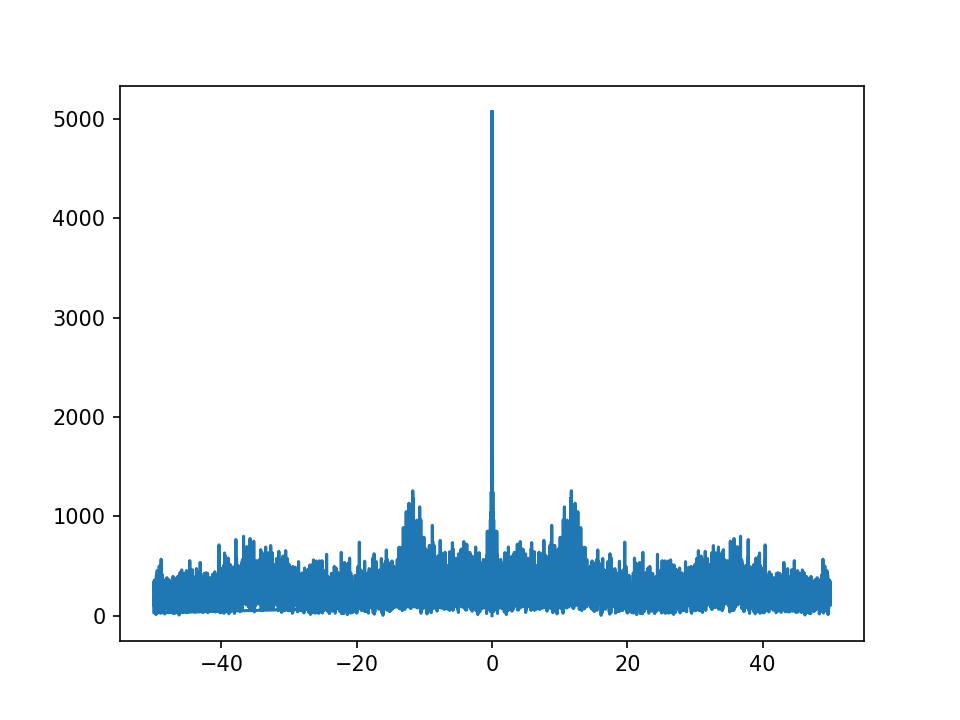

In [33]:
import numpy as np
gyroxfreq=np.fft.fft(df['AccY'].iloc[700:9000]-np.mean(df['AccY'].iloc[700:9000]))

freq=np.fft.fftfreq(d=1/100, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))
#plt.xlim(-0.3,5)

<IPython.core.display.Javascript object>


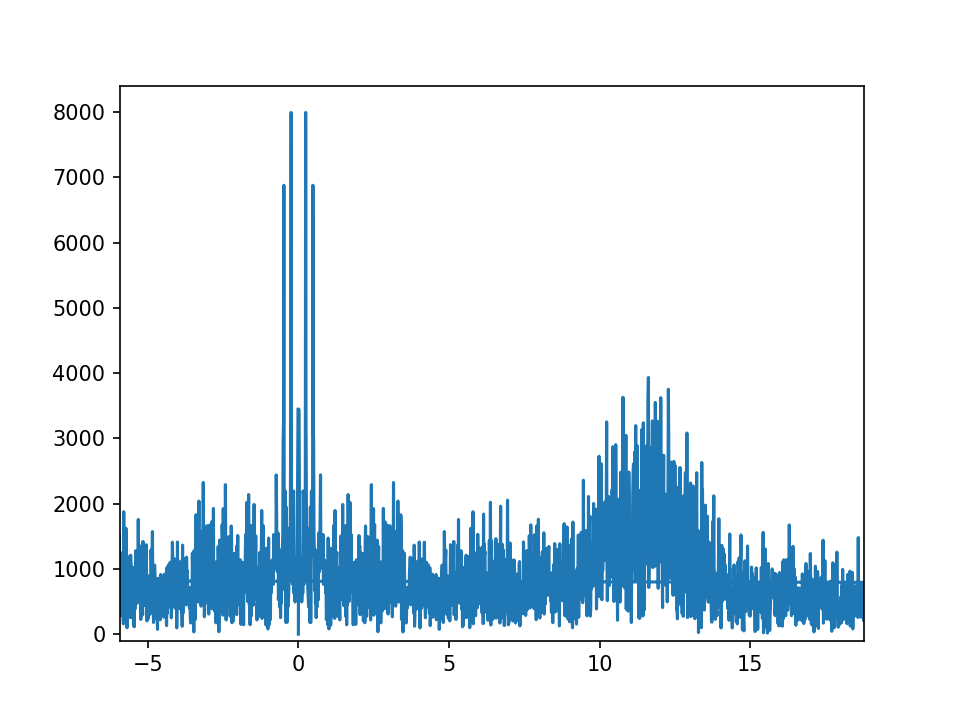

In [34]:
import numpy as np
gyroxfreq=np.fft.fft(df['AccZ'].iloc[700:9000]-np.mean(df['AccZ'].iloc[700:9000]))

freq=np.fft.fftfreq(d=1/100, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))
#plt.xlim(-0.3,5)

<IPython.core.display.Javascript object>


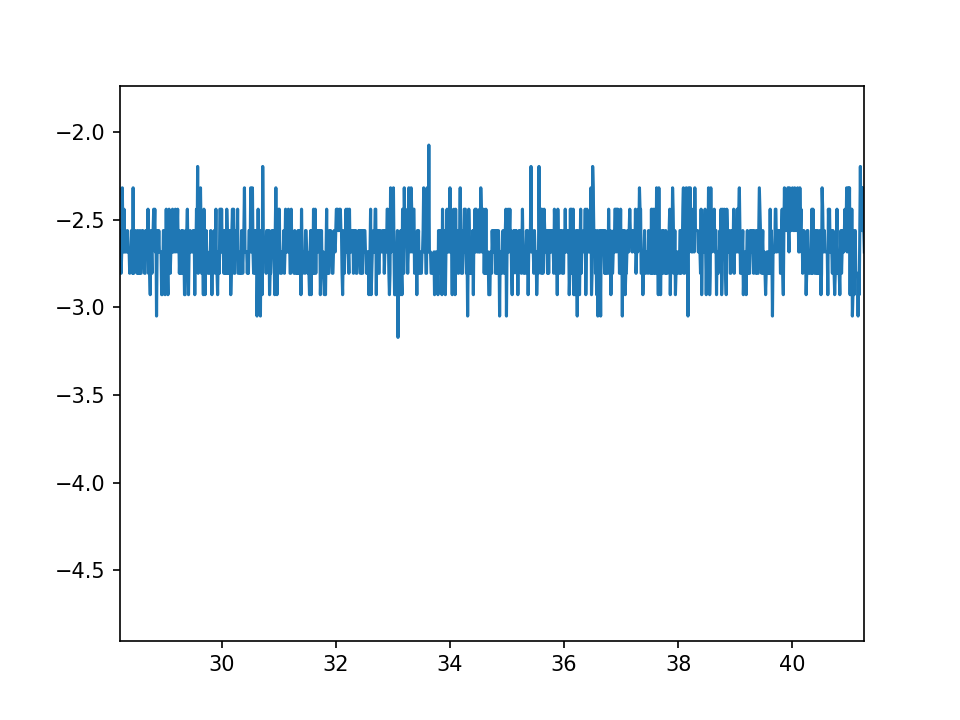

In [40]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'],df['GyroX'])

<IPython.core.display.Javascript object>


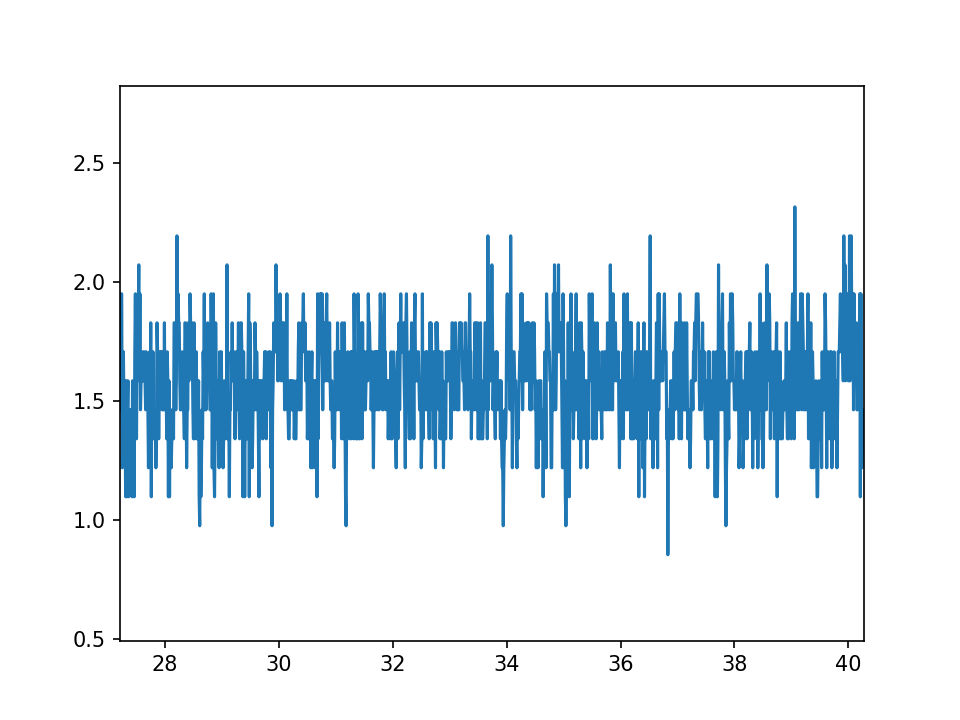

In [41]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'],df['GyroY'])

<IPython.core.display.Javascript object>


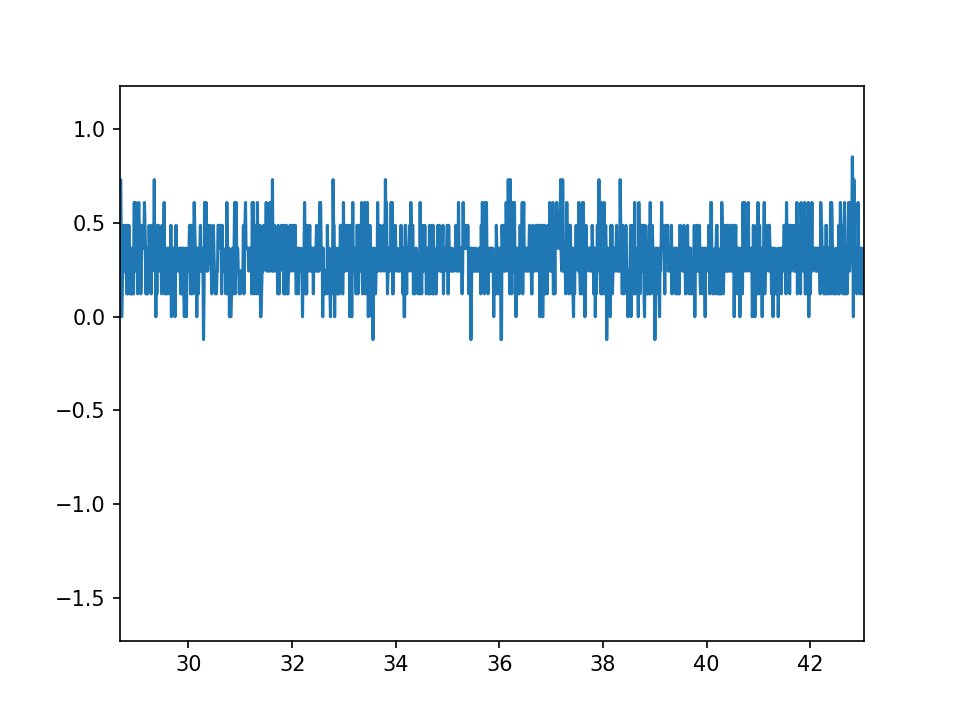

In [42]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'],df['GyroZ'])

<IPython.core.display.Javascript object>


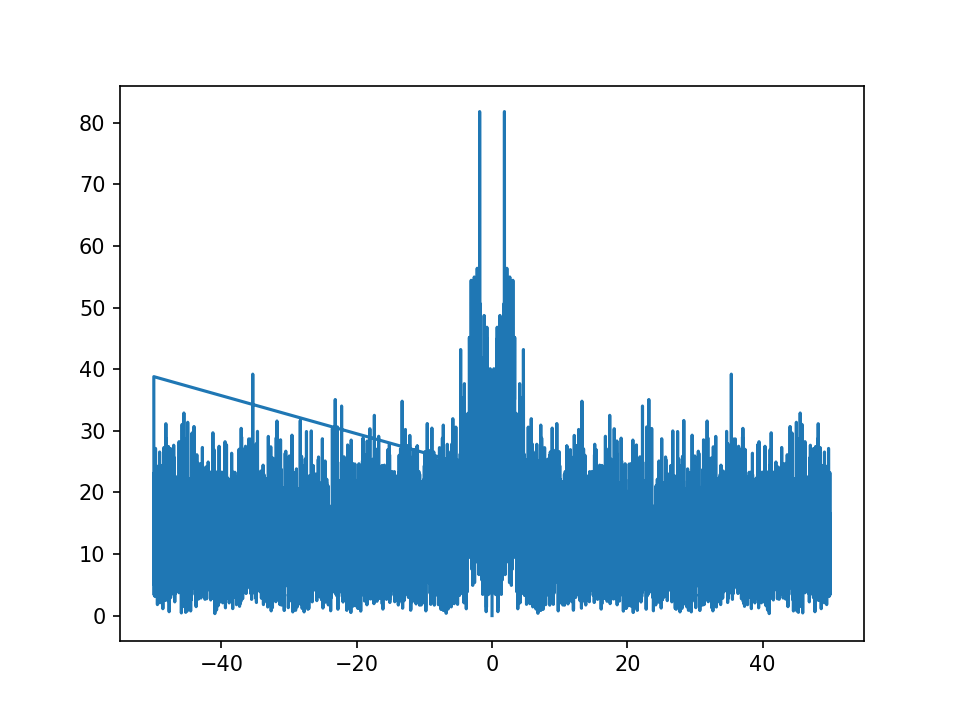

In [38]:
gyroxfreq=np.fft.fft(df['GyroX'].iloc[700:9000]-np.mean(df['GyroX'].iloc[700:9000]))

freq=np.fft.fftfreq(d=1/100, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))


<IPython.core.display.Javascript object>


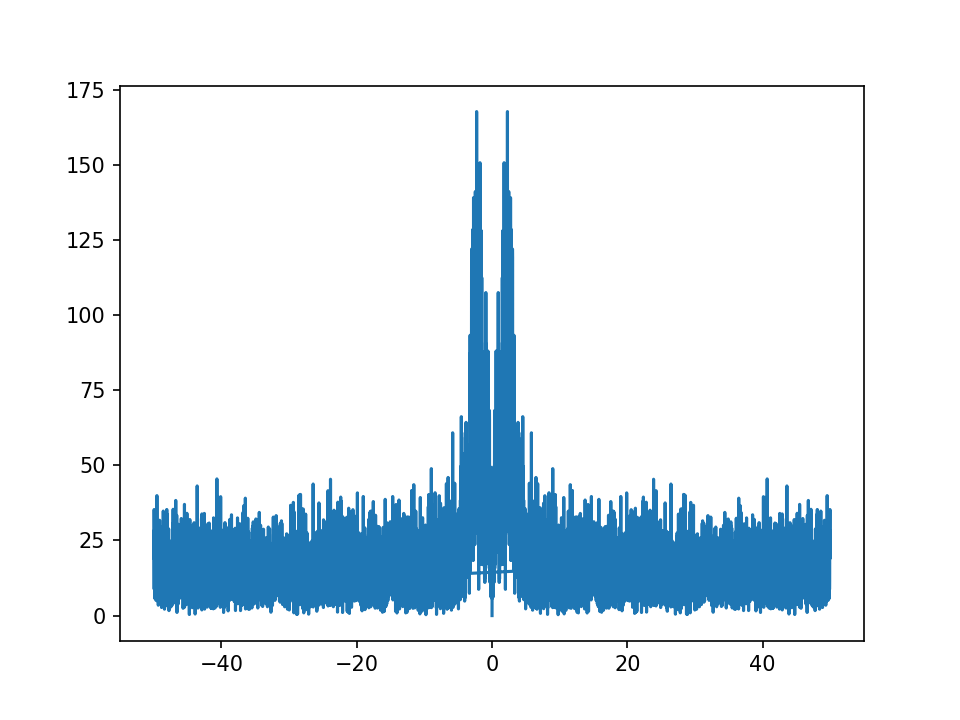

In [39]:
gyroxfreq=np.fft.fft(df['GyroY'].iloc[700:9000]-np.mean(df['GyroY'].iloc[700:9000]))

freq=np.fft.fftfreq(d=1/100, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))


<IPython.core.display.Javascript object>


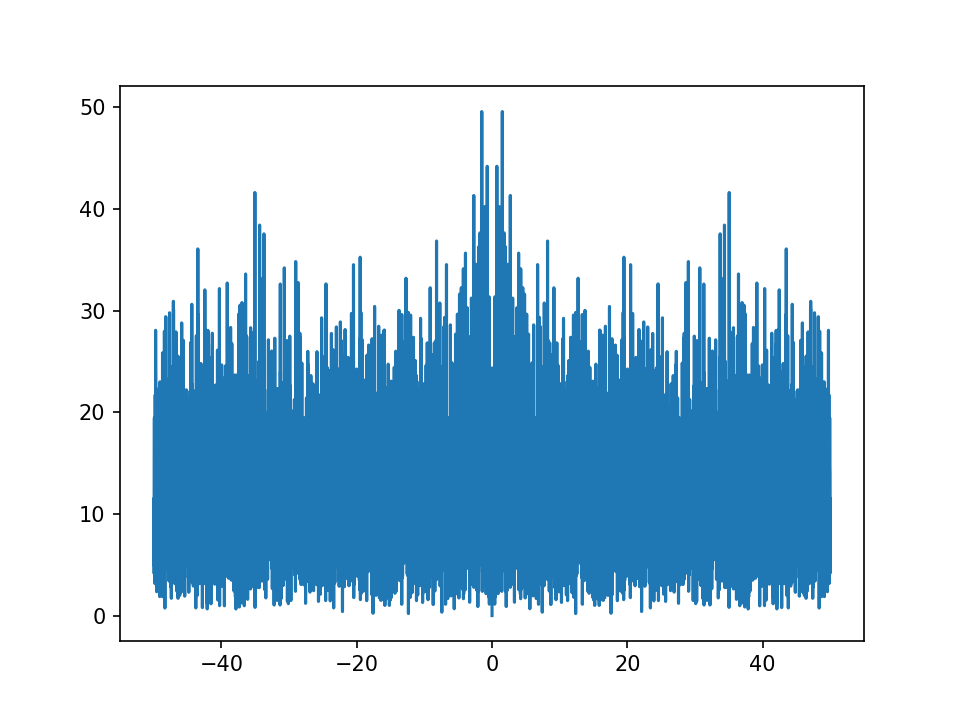

In [37]:
gyroxfreq=np.fft.fft(df['GyroZ'].iloc[700:9000]-np.mean(df['GyroZ'].iloc[700:9000]))

freq=np.fft.fftfreq(d=1/100, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))


<IPython.core.display.Javascript object>


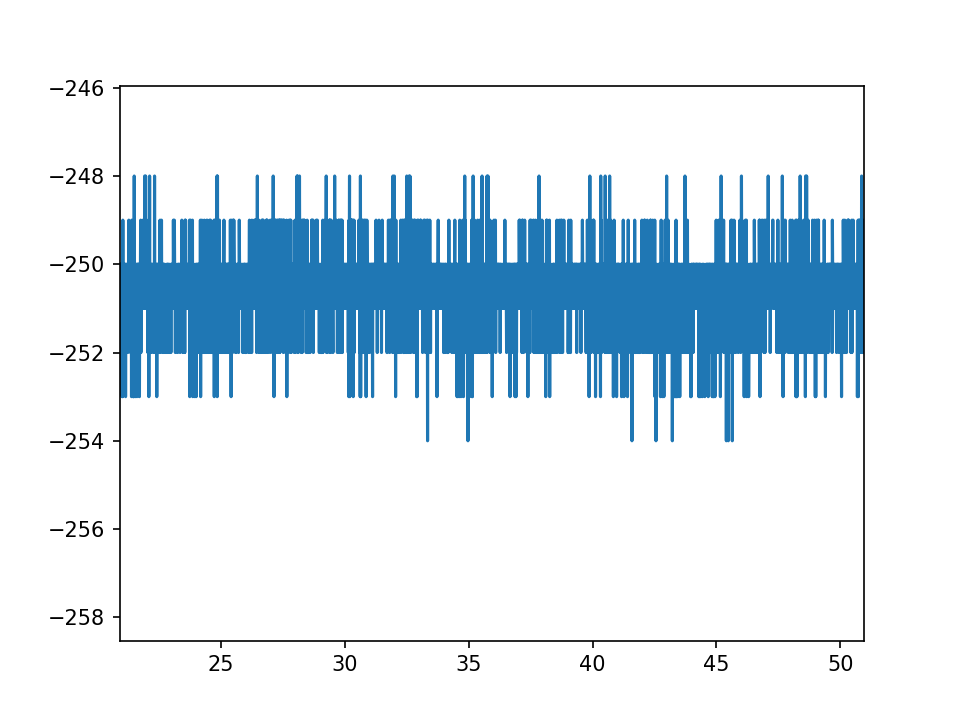

In [43]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'],df['MagnX'])

<IPython.core.display.Javascript object>


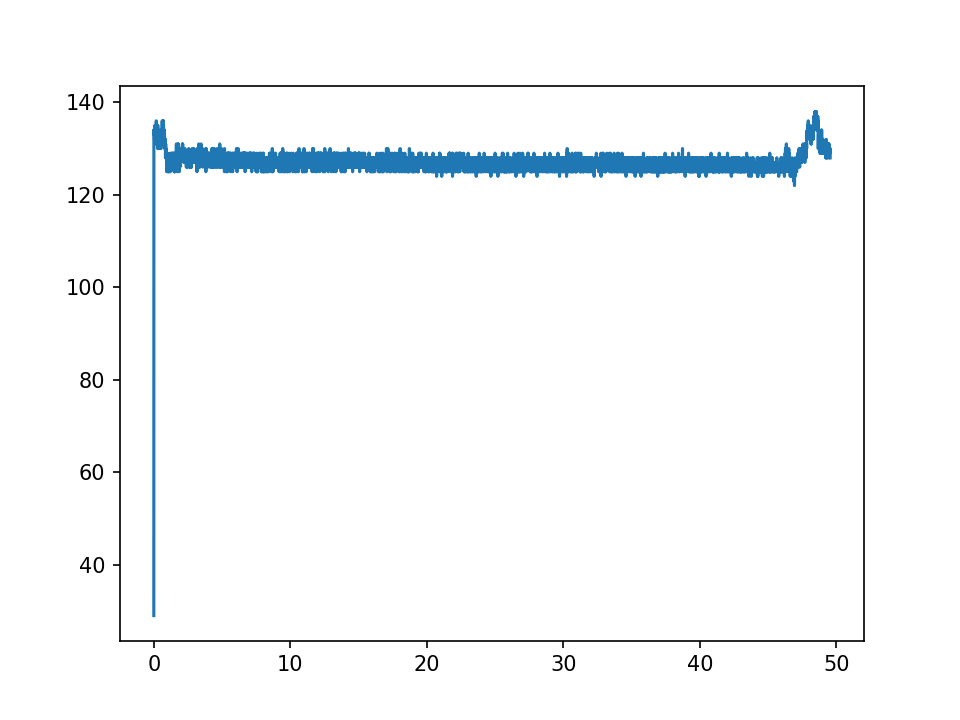

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'],df['MagnY'])

<IPython.core.display.Javascript object>


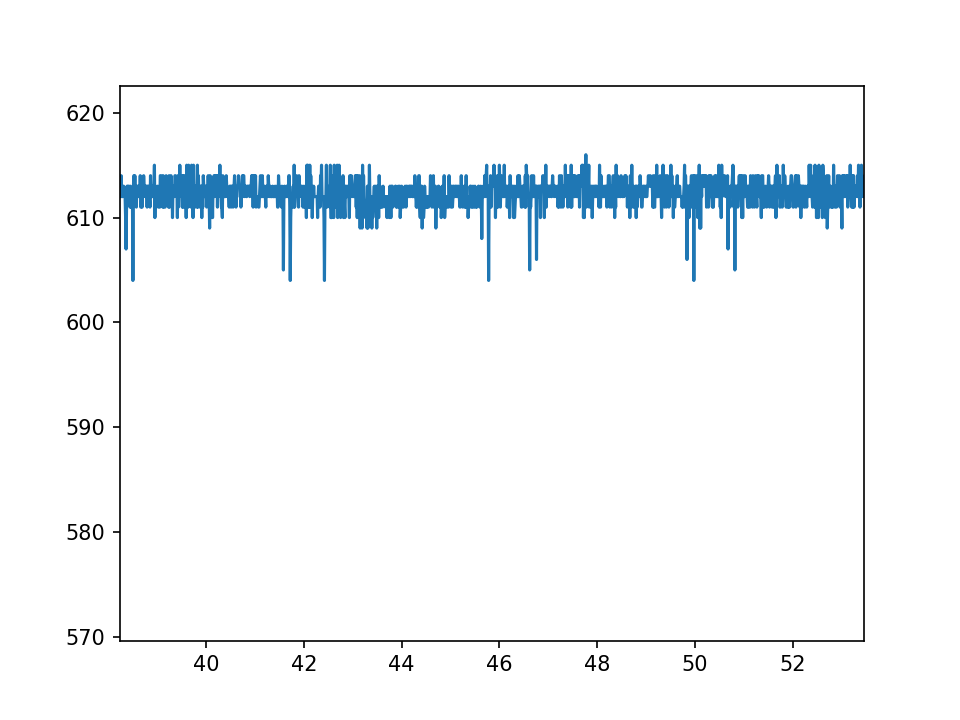

In [44]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(df['Time'],df['MagnZ'])

<IPython.core.display.Javascript object>


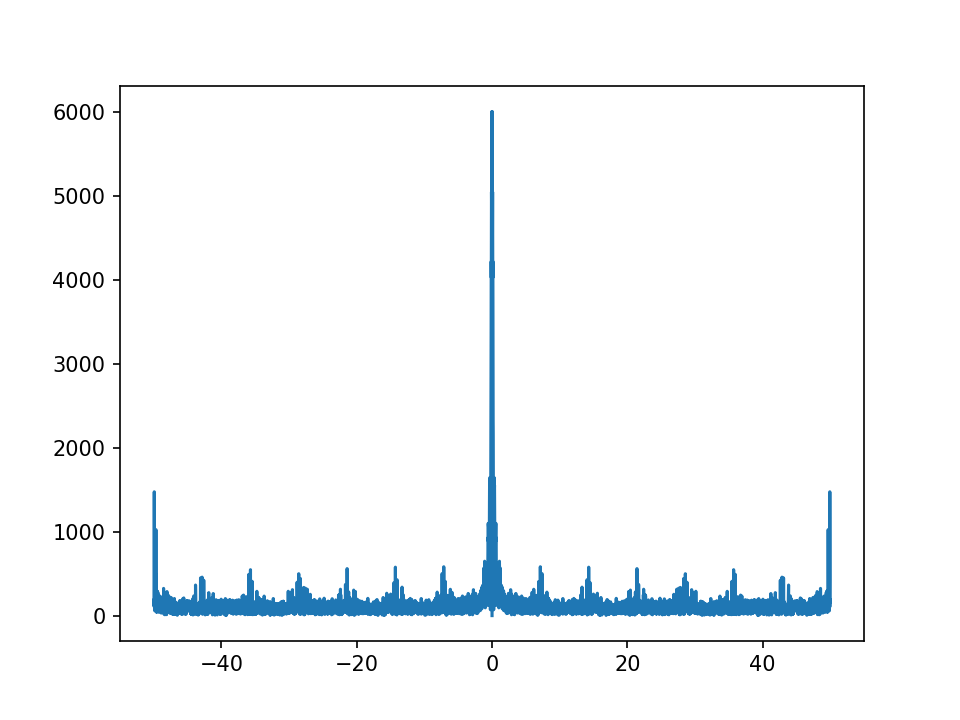

In [12]:
import numpy as np
gyroxfreq=np.fft.fft(df['MagnZ'].iloc[2500:12500]-np.mean(df['MagnZ'].iloc[2500:12500]))

freq=np.fft.fftfreq(d=1/100, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq))


## FILTERING ACC

### Under Chair AccZ

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'battito')

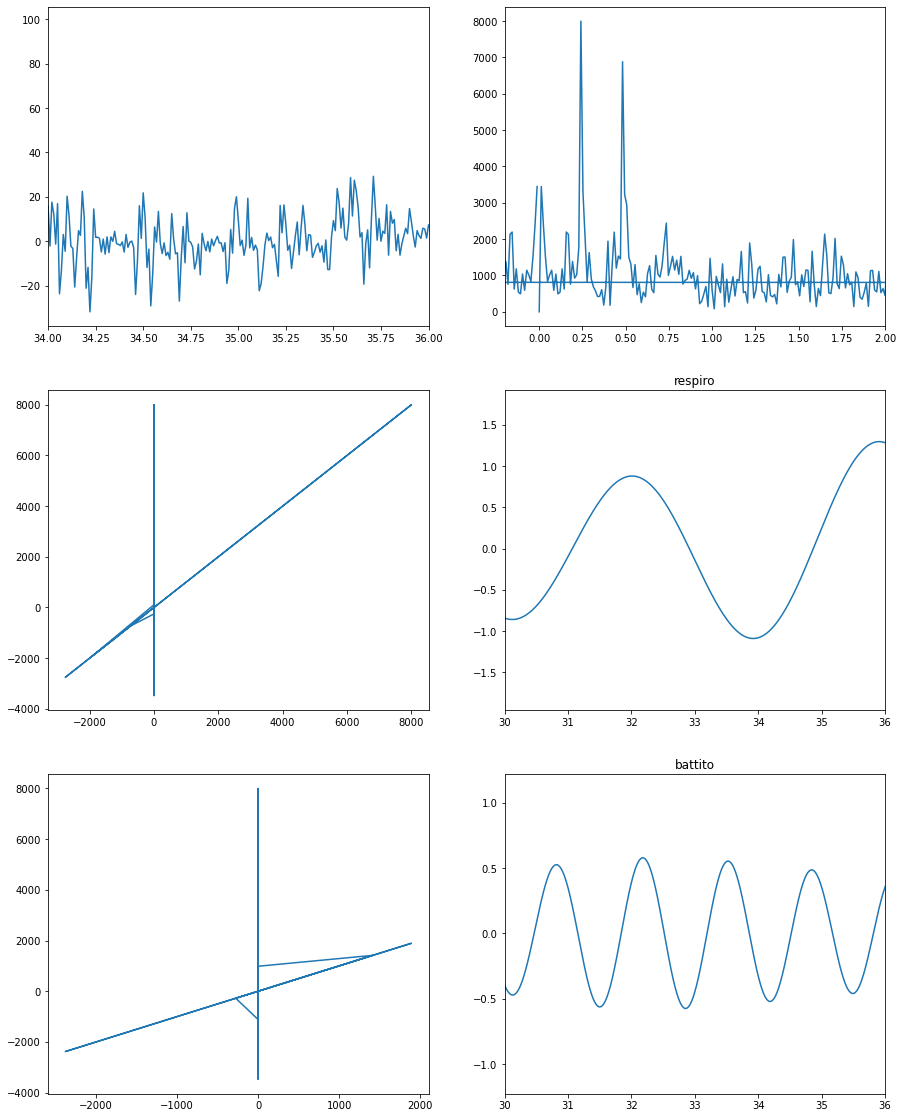

In [132]:
%matplotlib inline
fig, axs = plt.subplots(3,2,figsize=(15,20))

axs[0,0].plot(df['Time'].iloc[700:9000],df['AccZ'].iloc[700:9000]-np.mean(df['AccZ'].iloc[700:9000]))
axs[0,0].set_xlim(34,36)


accx=np.fft.fft(df['AccZ'].iloc[700:9000]-np.mean(df['AccZ'].iloc[700:9000]))
accxfreq=np.fft.fftfreq(d=1/100, n=len(accx))


axs[0,1].plot(accxfreq,abs(accx))
axs[0,1].set_xlim(-0.2,2)

                        
cut_signal = accx.copy()
cut_signal[(accxfreq>0.3)] = 0 
cut_signal[(accxfreq<0.15)] = 0

cut_signal_inverse = np.fft.ifft(cut_signal)


axs[1,0].plot(cut_signal,accx) 
axs[1,1].plot(df['Time'].iloc[700:9000],cut_signal_inverse)
axs[1,1].set_xlim(30,36)
axs[1,1].set_title('respiro')

cut_signal2 = accx.copy()
cut_signal2[(accxfreq>0.8)] = 0 
cut_signal2[(accxfreq<0.65)] = 0

cut_signal_inverse2 = np.fft.ifft(cut_signal2)

axs[2,0].plot(cut_signal2,accx) 
axs[2,1].plot(df['Time'].iloc[700:9000],cut_signal_inverse2)
axs[2,1].set_xlim(30,36)
axs[2,1].set_title('battito')


### Under Chair GyroX

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'battito')

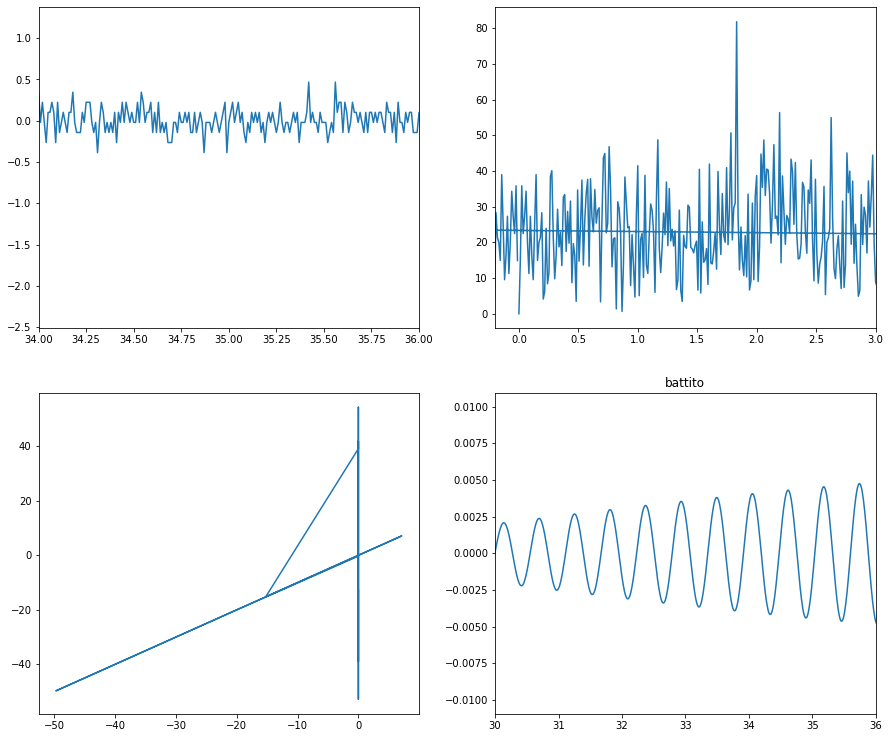

In [133]:
%matplotlib inline
fig, axs = plt.subplots(2,2,figsize=(15,13))

axs[0,0].plot(df['Time'].iloc[700:9000],df['GyroX'].iloc[700:9000]-np.mean(df['GyroX'].iloc[700:9000]))
axs[0,0].set_xlim(34,36)


accx=np.fft.fft(df['GyroX'].iloc[700:9000]-np.mean(df['GyroX'].iloc[700:9000]))
accxfreq=np.fft.fftfreq(d=1/100, n=len(accx))


axs[0,1].plot(accxfreq,abs(accx))
axs[0,1].set_xlim(-0.2,3)

                        
cut_signal2 = accx.copy()
cut_signal2[(accxfreq>1.8)] = 0 
cut_signal2[(accxfreq<1.75)] = 0

cut_signal_inverse2 = np.fft.ifft(cut_signal2)

axs[1,0].plot(cut_signal2,accx) 
axs[1,1].plot(df['Time'].iloc[700:9000],cut_signal_inverse2)
axs[1,1].set_xlim(30,36)
axs[1,1].set_title('battito')


### Under Chair MagnY

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'battito')

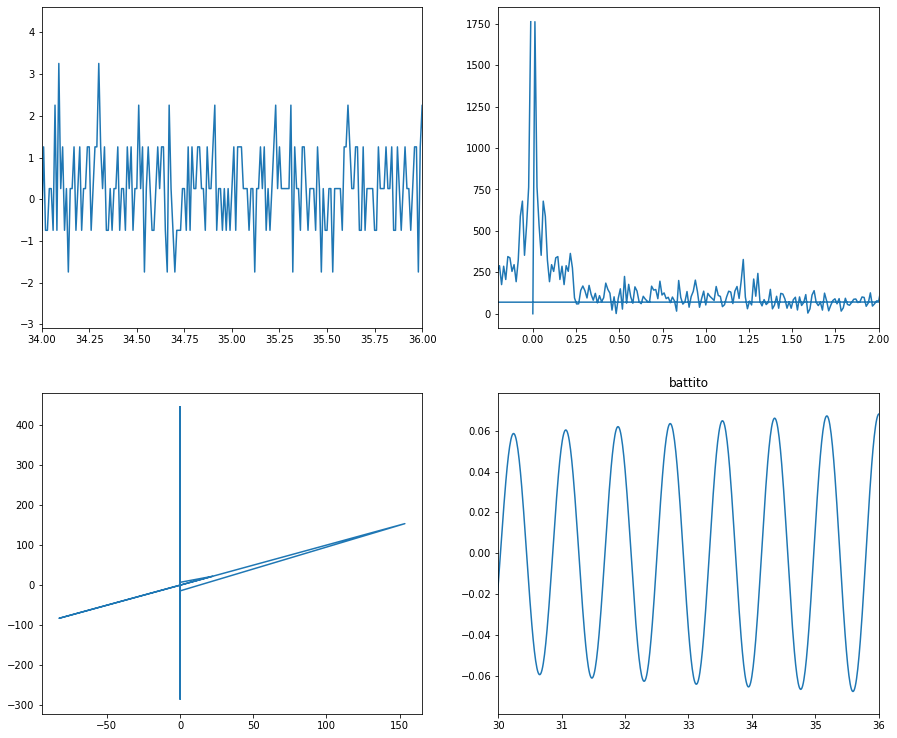

In [134]:
%matplotlib inline
fig, axs = plt.subplots(2,2,figsize=(15,13))

axs[0,0].plot(df['Time'].iloc[700:9000],df['MagnY'].iloc[700:9000]-np.mean(df['MagnY'].iloc[700:9000]))
axs[0,0].set_xlim(34,36)


accx=np.fft.fft(df['MagnY'].iloc[700:9000]-np.mean(df['MagnY'].iloc[700:9000]))
accxfreq=np.fft.fftfreq(d=1/100, n=len(accx))


axs[0,1].plot(accxfreq,abs(accx))
axs[0,1].set_xlim(-0.2,2)

                        
cut_signal = accx.copy()
cut_signal[(accxfreq>1.25)] = 0 
cut_signal[(accxfreq<1.2)] = 0

cut_signal_inverse = np.fft.ifft(cut_signal)


axs[1,0].plot(cut_signal,accx) 
axs[1,1].plot(df['Time'].iloc[700:9000],cut_signal_inverse)
axs[1,1].set_xlim(30,36)
axs[1,1].set_title('battito')



## NB 

Sono diverse le frequenze di battito (45 bpm vs 108 bpm vs 75)...

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-40.0, 40.0)

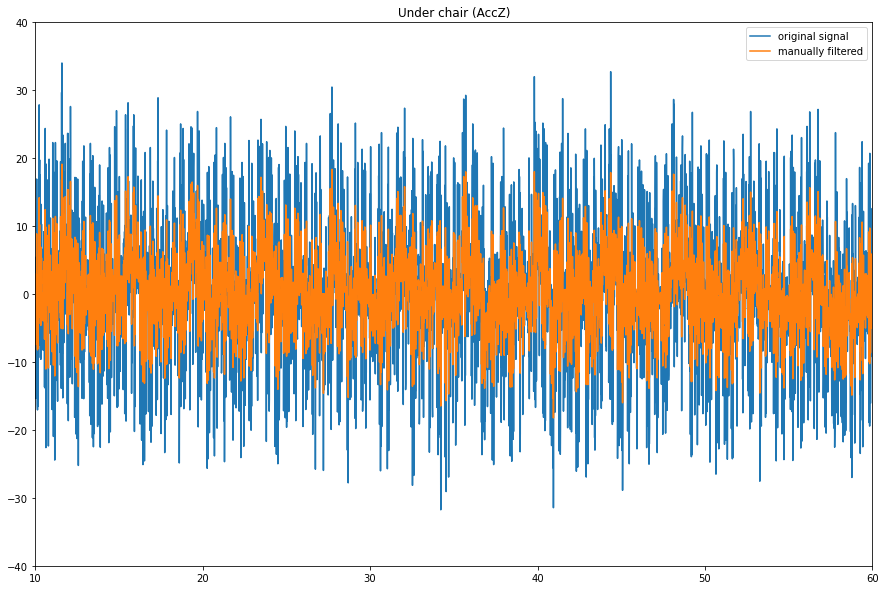

In [166]:

accx=np.fft.fft(df['AccZ'].iloc[700:9000]-np.mean(df['AccZ'].iloc[700:9000]))
accxfreq=np.fft.fftfreq(d=1/100, n=len(accx))

                        
cut_signal = accx.copy()
cut_signal[(accxfreq>1.5)] = 0 

cut_signal_inverse = np.fft.ifft(cut_signal)

fig,ax=plt.subplots(1,1,figsize=(15,10))
 

plt.plot(df['Time'].iloc[700:9000],df['AccZ'].iloc[700:9000]-np.mean(df['AccZ'].iloc[700:9000]),label='original signal')
plt.plot(df['Time'].iloc[700:9000],cut_signal_inverse,label='manually filtered')
plt.legend()
plt.title('Under chair (AccZ)')
plt.xlim(10,60)
plt.ylim(-40,40)


#### WAVELET

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-40.0, 40.0)

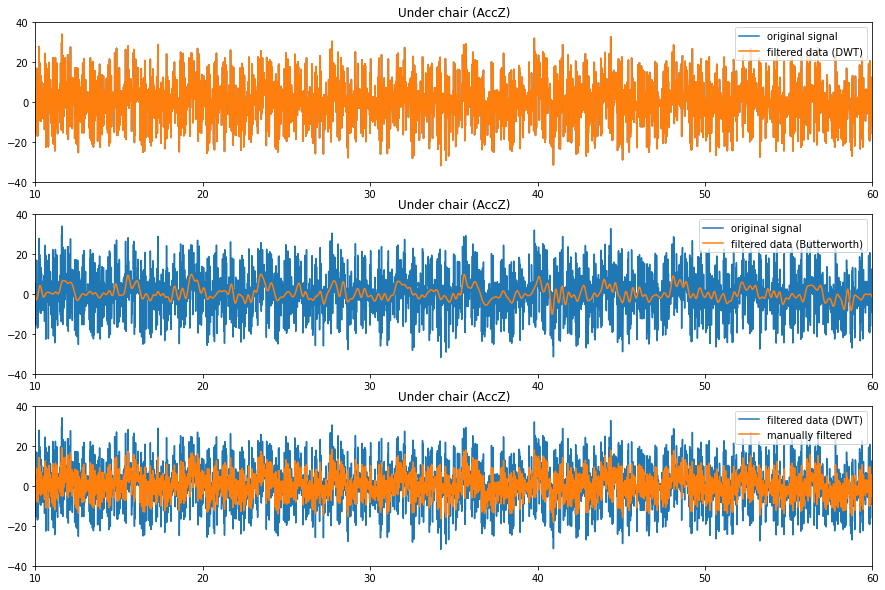

In [180]:
import pywt
import scipy.signal as signal

wavelet_type='db4'
data=df['AccZ'].iloc[700:9000]-np.mean(df['AccZ'].iloc[700:9000])

thresh = 0.5 #63% of low freq
    
DWTcoeffs = pywt.wavedec(data,wavelet_type,mode='periodic')
DWTcoeffs[1:] = (pywt.threshold(i, value=thresh, mode="hard" ) for i in DWTcoeffs[1:])
filtered_data_dwt=pywt.waverec(DWTcoeffs,wavelet_type,mode='periodic')



fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,10))

ax1.plot(df['Time'].iloc[700:9000],data,label='original signal')
ax1.plot(df['Time'].iloc[700:9000],filtered_data_dwt, label='filtered data (DWT)')
ax1.legend()
ax1.set_title('Under chair (AccZ)')
ax1.set_xlim(10,60)
ax1.set_ylim(-40,40)


fc = 3 #cut-off frequency
w = fc / (100 / 2) 
b, a = signal.butter(5, w, 'low')
filtered_data_butterworth = signal.filtfilt(b, a, data)

ax2.plot(df['Time'].iloc[700:9000],data,label='original signal')
ax2.plot(df['Time'].iloc[700:9000],filtered_data_butterworth, label='filtered data (Butterworth)')
ax2.legend()
ax2.set_title('Under chair (AccZ)')
ax2.set_xlim(10,60)
ax2.set_ylim(-40,40)


ax3.plot(df['Time'].iloc[700:9000],filtered_data_dwt, label='filtered data (DWT)')
ax3.plot(df['Time'].iloc[700:9000],cut_signal_inverse,label='manually filtered')
ax3.legend()
ax3.set_title('Under chair (AccZ)')
ax3.set_xlim(10,60)
ax3.set_ylim(-40,40)


### Center Sternum


C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'battito')

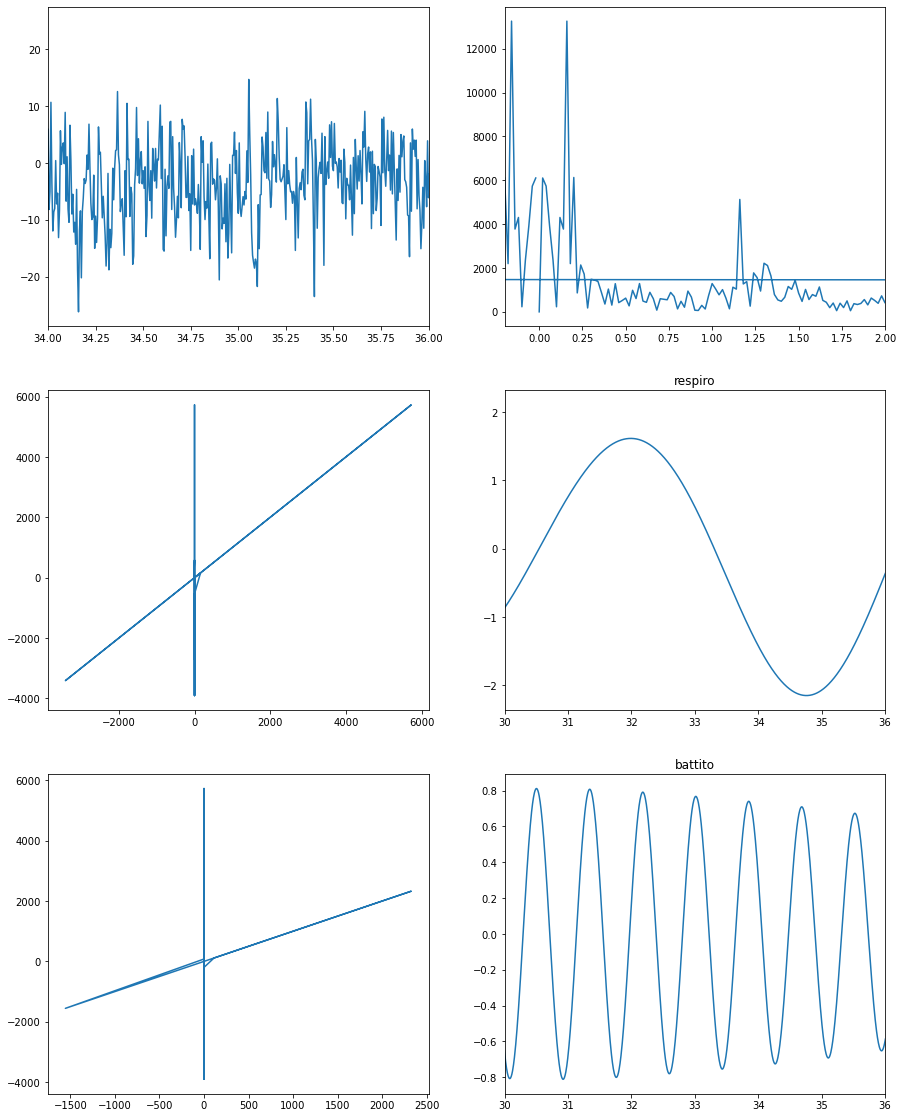

In [135]:
df2=pd.read_csv('center_sternum.txt',sep='\t')

df2['Time']=np.arange(0,len(df2['qi']))/200

%matplotlib inline
fig, axs = plt.subplots(3,2,figsize=(15,20))

axs[0,0].plot(df2['Time'].iloc[2500:12500],df2['AccX'].iloc[2500:12500]-np.mean(df2['AccX'].iloc[2500:12500]))
axs[0,0].set_xlim(34,36)


accx=np.fft.fft(df2['AccX'].iloc[2500:12500]-np.mean(df2['AccX'].iloc[2500:12500]))
accxfreq=np.fft.fftfreq(d=1/200, n=len(accx))


axs[0,1].plot(accxfreq,abs(accx))  
axs[0,1].set_xlim(-0.2,2)
                        
cut_signal = accx.copy()
cut_signal[(accxfreq>0.3)] = 0 
cut_signal[(accxfreq<0.1)] = 0

cut_signal_inverse = np.fft.ifft(cut_signal)


axs[1,0].plot(cut_signal,accx) 
axs[1,1].plot(df2['Time'].iloc[2500:12500],cut_signal_inverse)
axs[1,1].set_xlim(30,36)
axs[1,1].set_title('respiro')

cut_signal2 = accx.copy()
cut_signal2[(accxfreq>1.25)] = 0 
cut_signal2[(accxfreq<1.1)] = 0

cut_signal_inverse2 = np.fft.ifft(cut_signal2)

axs[2,0].plot(cut_signal2,accx) 
axs[2,1].plot(df2['Time'].iloc[2500:12500],cut_signal_inverse2)
axs[2,1].set_xlim(30,36)
axs[2,1].set_title('battito')

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Center sternum')

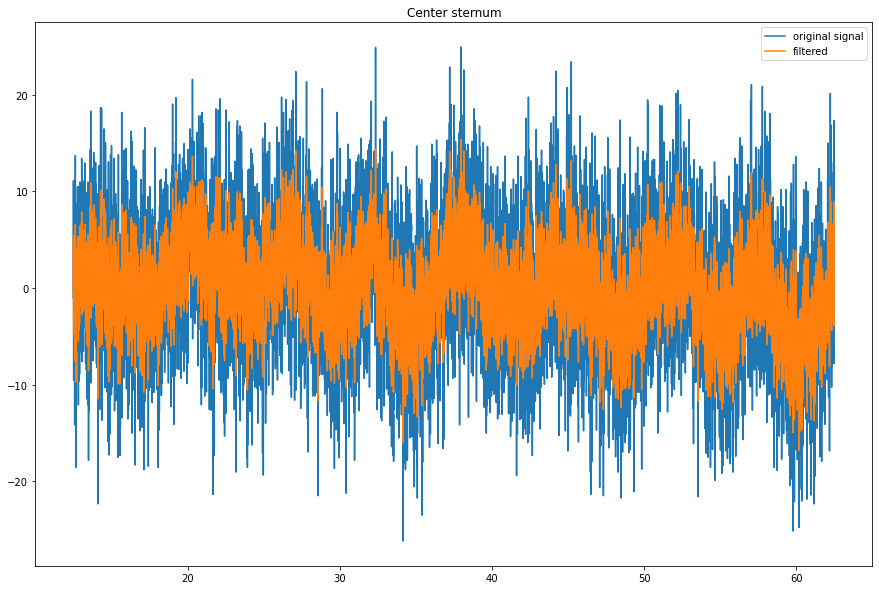

In [141]:

accx=np.fft.fft(df2['AccX'].iloc[2500:12500]-np.mean(df2['AccX'].iloc[2500:12500]))
accxfreq=np.fft.fftfreq(d=1/200, n=len(accx))

                        
cut_signal = accx.copy()
cut_signal[(accxfreq>1.5)] = 0 

cut_signal_inverse = np.fft.ifft(cut_signal)

fig,ax=plt.subplots(1,1,figsize=(15,10))
 

plt.plot(df2['Time'].iloc[2500:12500],df2['AccX'].iloc[2500:12500]-np.mean(df2['AccX'].iloc[2500:12500]),label='original signal')
plt.plot(df2['Time'].iloc[2500:12500],cut_signal_inverse,label='filtered')
plt.legend()
plt.title('Center sternum')
